<a href="https://colab.research.google.com/github/Lirgis0/A-B-test-Ya_8/blob/main/project_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек, настройка вывода и загрузка датасетов

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 150
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
import scipy.stats as stats

In [ ]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# Предобработка данных

In [ ]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
hypothesis.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

In [ ]:
hypothesis.columns = hypothesis.columns.str.lower()

In [ ]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [ ]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [ ]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [ ]:
orders.duplicated().sum()

0

In [ ]:
orders.isna().mean()

transaction_id    0.0
visitor_id        0.0
date              0.0
revenue           0.0
group             0.0
dtype: float64

In [ ]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitors.duplicated().sum()

0

In [ ]:
visitors.isna().mean()

date        0.0
group       0.0
visitors    0.0
dtype: float64

В датасетах нет пропусков и дубликатов. В датасете orders переименовал и привел к нижнему регистру столбцы.


 # Приоритизация гипотез

In [ ]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
hypothesis['ise'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ise']].sort_values(by = 'ise', ascending = False)

,hypothesis,ise
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [ ]:
hypothesis['rise'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'rise']].sort_values(by = 'rise', ascending = False)

,hypothesis,rise
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Параметр Reach оценивает охват пользователей, поэтому очевидно,что в первом случае,когда не учитывали этот параметр лидировала гипотеза со скидкой в день рождения. В случае когда этот параметр учитывался, в лидеры вышли гипотезы которые охватывают максимальное количество пользователей.

# Анализ A/B-теста

In [ ]:
# общее число покупателей по группам
orders.groupby('group').agg({'visitor_id': 'nunique'})

,visitor_id
group,
A,503
B,586


In [ ]:
# всего покупателей
orders['visitor_id'].nunique()

1031

Есть пользователи которые участвовали в двух группах одновременно.

Мы можем теоретически отфильтровать пользователей в датасете  orders, но похоже, что у нас нет возможности сделать это в датасете visitors, тк там указывается только к какой группе относиться посетитель. 

Удаление и не удаление пересечений из orders - решения примерно одного уровня.

In [ ]:
orders.groupby('visitor_id').agg({'group': 'nunique'}).value_counts()

group
1        973
2         58
dtype: int64


Пользователей, которые в двух группах сразу состоят 58 человек. В целом ~ 6% от всех кто принимал участие в тесте. Думаю продолжим тест с ними.



1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

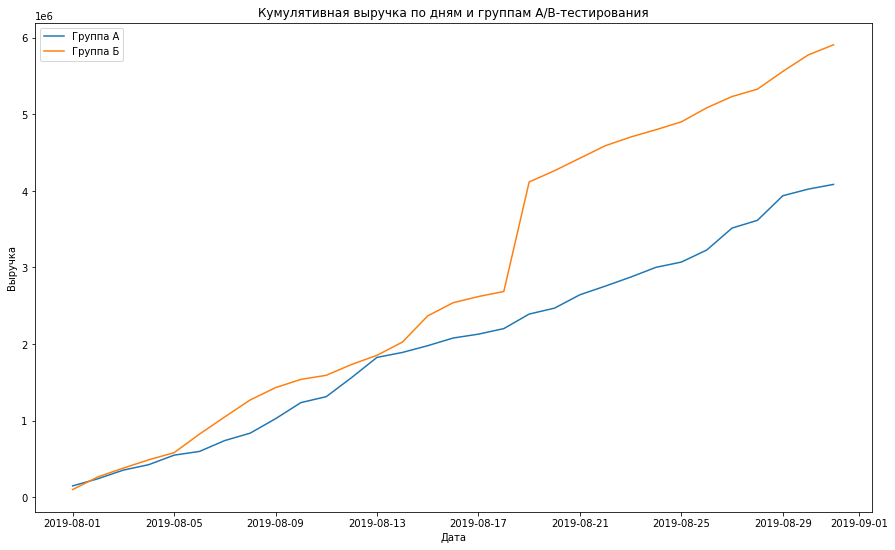

In [ ]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(['Группа А', 'Группа Б'])
plt.show()

В целом графики нормальные, за исключением резкого скачка в группе Б. Либо одна очень крупная покупка, либо просто очень много покупок 18 августа. Явно аномальный скачок, дальше разберемся,что это.

2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

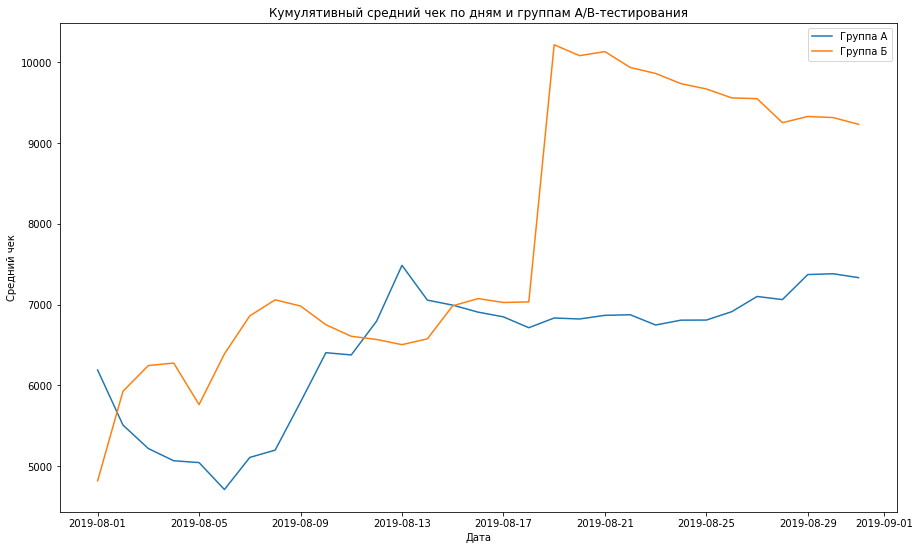

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend(['Группа А', 'Группа Б'])
plt.show()

В принципе графики стабилизировались, но опять же в группе Б эта аномалия примерно 18 августа.

Нужно отметить, что в группе Б кумулятивный средний чек снижается потому что приходит в себя после скачка 18 августа - приходит в норму.

3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

Text(0.5, 1.0, 'График относительного различия кумулятивного среднего чека группы B к группе А')

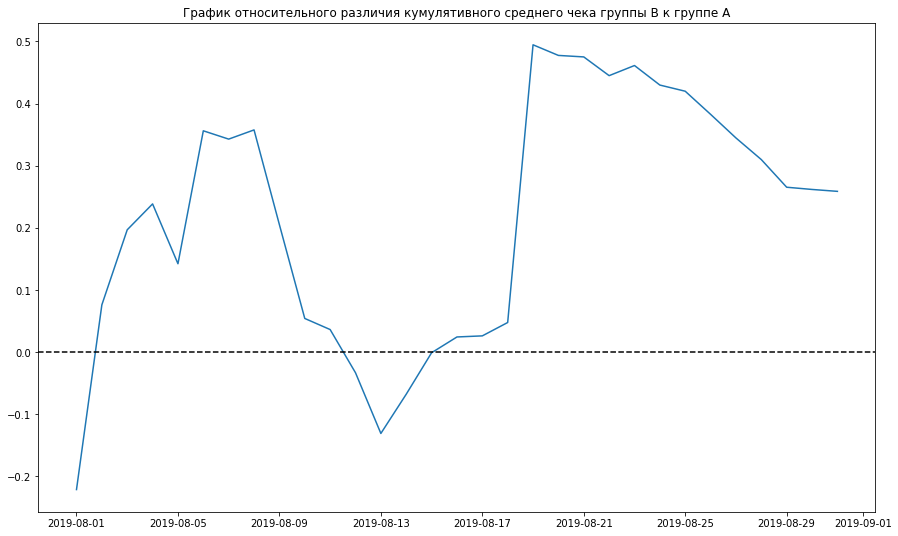

In [ ]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
plt.figure(figsize=(15, 9))
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного различия кумулятивного среднего чека группы B к группе А')

Та же картина, резкий скачок в группе Б

4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

<function matplotlib.pyplot.show(close=None, block=None)>

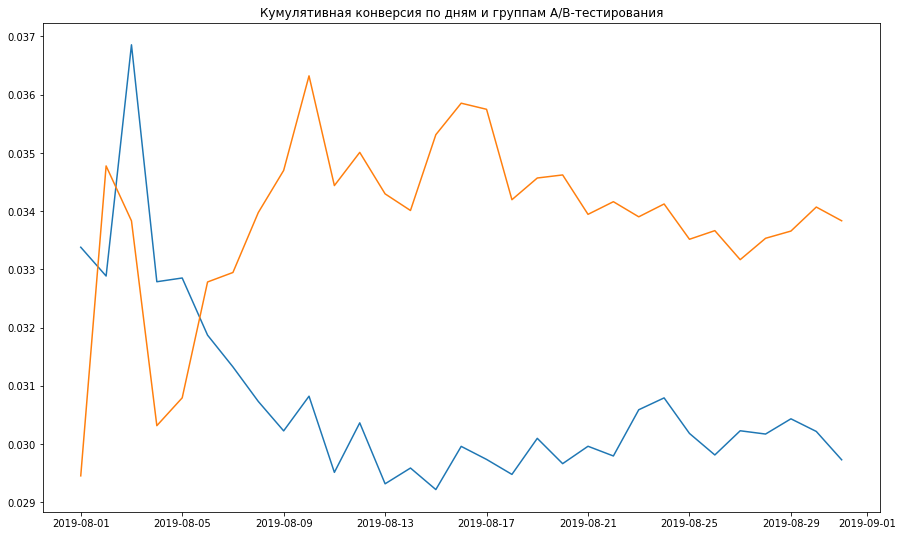

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15, 9))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по дням и группам A/B-тестирования')
plt.show

Группа Б показывает лучшие результаты, графики стабилизировались.

5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

<function matplotlib.pyplot.show(close=None, block=None)>

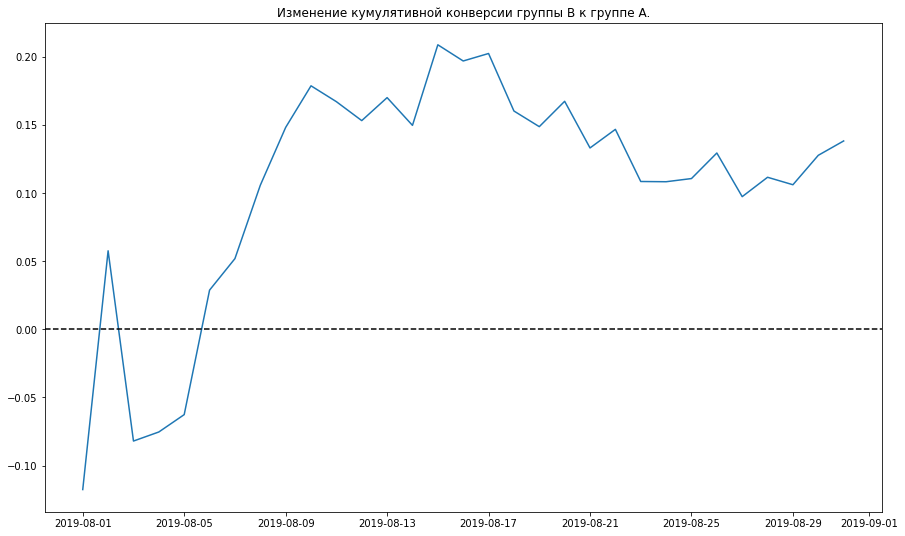

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 9))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Изменение кумулятивной конверсии группы B к группе A.')
plt.axhline(y=0, color='black', linestyle='--')
plt.show

Та же картина: конверсия в группе Б стабильно выше, чем группе А.

Куммулятивная конверсия в группе Б примерно на 15% выше чем в группе А.  

6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

<function matplotlib.pyplot.show(close=None, block=None)>

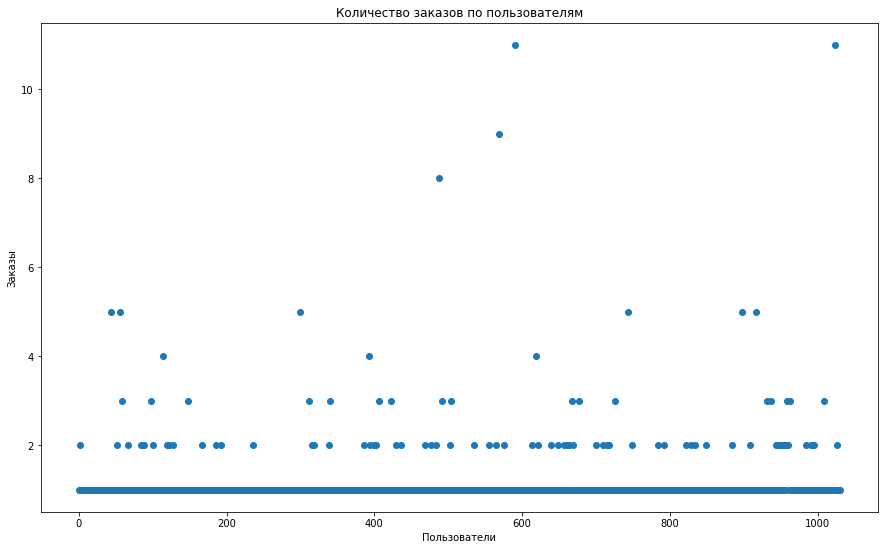

In [ ]:
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
ordersByUsers.columns = ['visitor_id', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15, 9))
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show

Видно,что в основная масса пользователей совершает не более трех заказов, хотя есть и рекордсмены, у них больше 10.

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [ ]:
np.percentile(ordersByUsers['orders'], [90, 95, 97.5, 99])

array([1., 2., 3., 4.])

Возьмем 97,5 перцениль, это три заказа, их и будем считать верхней границей нормы.

8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

<function matplotlib.pyplot.show(close=None, block=None)>

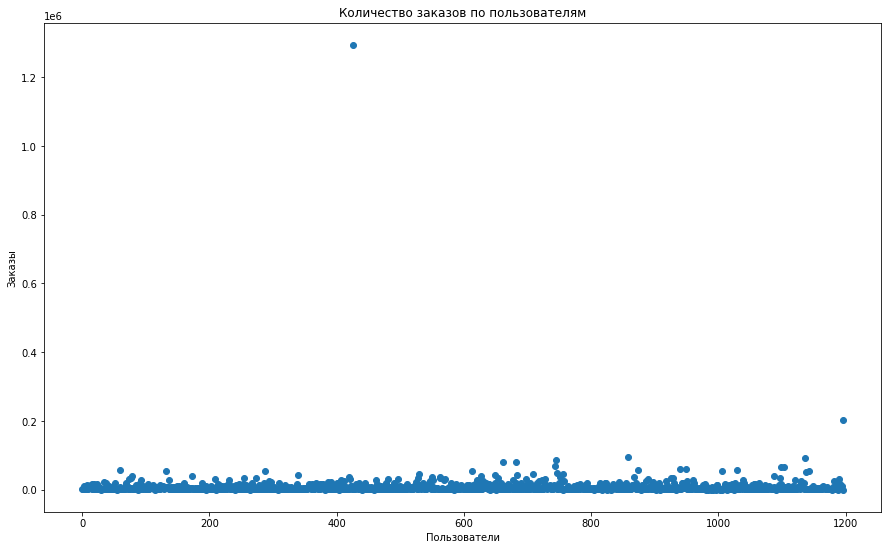

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15, 9))
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.scatter(x_values, orders['revenue']) 
plt.show

Похоже это та покупка, которая сбивала графики выше, похоже что аномалия это разовая покупка за 1 200 000. Из- за нее не рассмотреть, что происходит в основной группе заказов. Отфильтруем ее.

<function matplotlib.pyplot.show(close=None, block=None)>

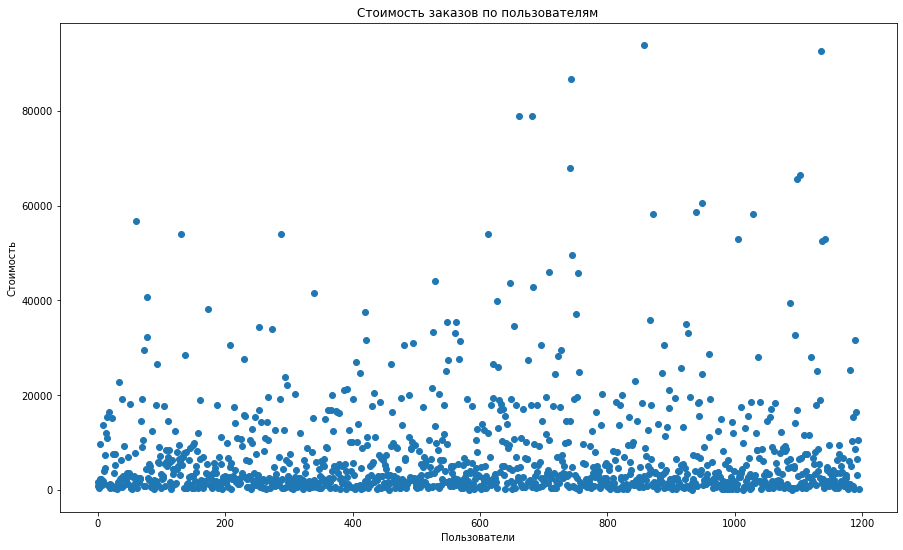

In [ ]:
x_values = pd.Series(range(0, len(orders[orders['revenue'] < 200000]['revenue'])))
 
plt.figure(figsize=(15, 9))
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')
plt.scatter(x_values, orders[orders['revenue'] < 200000]['revenue']) 
plt.show

Теперь видно, что основная масса заказов меньше 20 000. Но чтобы точнее понять посмотрим перцентили

9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [ ]:
np.percentile(orders['revenue'], [90, 95, 97.5, 99])

array([18168. , 28000. , 39530. , 58233.2])

Граница в 40 000 будет в самый раз.

10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

<div class="alert alert-info">
<b> Комментарий студента</b>

Согласен.
    
Н0 - Разницы в конверсии между группами А и Б нет.
    
Н1 - Есть статистически значимое отличие в конверсии между группами А и Б.
    
Alpha = 0.05. Метод: U-критерий Манна — Уитни.
</div>

In [ ]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']
 
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']
 
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
                                 ), name='orders')],axis=0)
sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
                                 ), name='orders')],axis=0)
print('p-value:') 
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительная разница между группами А и Б:')
print("{0:.5f}".format(sampleB.mean()/sampleA.mean()-1))

p-value:
0.01679
Относительная разница между группами А и Б:
0.13808


p-value меньше 0.05 - значит есть статистически значимое отличие в конверсии между тестируемыми группами
Относительное различие почти 14%

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

<div class="alert alert-info">
<b> Комментарий студента</b>

Н0 - Разницы в среднем чеке между группами А и Б нет.

Н1 - Есть статистически значимое отличие в среднем чеке между группами А и Б.

Alpha = 0.05. Метод: U-критерий Манна — Уитни.
</div>

In [ ]:
print('p-value:')
print("{0:.5f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница между группами А и Б:')
print("{0:.5f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:
0.72929
Относительная разница между группами А и Б:
0.25871


p-value больше 0.05 - значит статистически значимого отличия в среднем чеке между тестируемыми группами нет. Хотя различий в среднем чеке заказа между группами А и В нет, а наблюдаемое превышение среднего чека группы В на 25,9% не является значимым, получено случайно.

12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

Фильтруем данные, аномальные - те кто совершил три заказа и более, и пользователей , совершивших заказы дороже 40 000:

<div class="alert alert-info">
<b> Комментарий студента</b>

Н0 - Разницы в конверсии между группами А и Б нет.

Н1 - Есть статистически значимое отличие в конверсии между группами А и Б.

Alpha = 0.05. Метод: U-критерий Манна — Уитни.
</div>

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [ ]:
print('p-value:')
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница между группами А и Б:')
print('{0:.5f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value:
0.00931
Относительная разница между группами А и Б:
0.16369


p-value меньше 0.05 - значит есть статистически значимое отличие в конверсии между тестируемыми группами и на очищенных данных. Относительное различие почти 16%, а было 14%.

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

<div class="alert alert-info">
<b> Комментарий студента</b>

Н0 - Разницы в среднем чеке между группами А и Б нет.

Н1 - Есть статистически значимое отличие в среднем чеке между группами А и Б.

Alpha = 0.05. Метод: U-критерий Манна — Уитни.
</div>

In [ ]:
print('p-value:')
print(
    '{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print('Относительная разница между группами А и Б:')
print(
    "{0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value:
0.71098
Относительная разница между группами А и Б:
0.06040


p-value больше 0.05 - значит статистически значимого отличия в среднем чеке между тестируемыми группами нет и в случае очищенных данных. Хотя тносительное различие теперь около 6%

14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

В итоге по "сырым" данным получили:
Конверсия:
p-value: 0.01679
Относительная разница между группами: 0.13808
p-value меньше 0.05 - значит есть статистически значимое отличие в конверсии между тестируемыми группами. Относительное различие почти 14%
Средний чек:
p-value: 0.72929
Относительная разница между группами: 0.25871
p-value больше 0.05 - значит статистически значимого отличия в среднем чеке между тестируемыми группами нет. Хотя относительное различие больше 25%

Очищенные данные:
Конверсия:
p-value: 0.00931
Относительная разница между группами: 0.16369
p-value меньше 0.05 - значит есть статистически значимое отличие в конверсии между тестируемыми группами и на очищенных данных. Относительное различие почти 16%, а было 14%.
СРедний чек:
p-value: 0.71098
Относительная разница между группами: 0.06040
p-value больше 0.05 - значит статистически значимого отличия в среднем чеке между тестируемыми группами нет и в случае очищенных данных. Хотя относительное различие теперь около 6%

После того, как убрали очень дорогие заказы, разница в среднем чеке стала не такой значительной, но конверсия и на "сырых" и на очищенных данных различается значимо. Средний чек особо между группами не различается, но конверсия значительно лучше у группы Б. Думаю тест можно останавливать, группа Б победила.